# Lab 4 - Python Lab
## Author: *Lamae Maharaj*
## Date: 11:59PM March 11, 2022

Load up the famous iris dataset. We are going to do a different prediction problem. Imagine the only input x is Species and you are trying to predict y which is Petal.Length. A reasonable prediction is the average petal length within each Species. Prove that this is the OLS model by fitting an appropriate `LinearRegression` model and then using the predict function to verify.

In [45]:
# importing dependcies
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

iris = load_iris()

# Looking at the dataset Bunch object
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
# Getting the description of a dataset using the DESCR key
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# We can also load the dataset through seaborn
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<AxesSubplot:xlabel='species', ylabel='petal_length'>

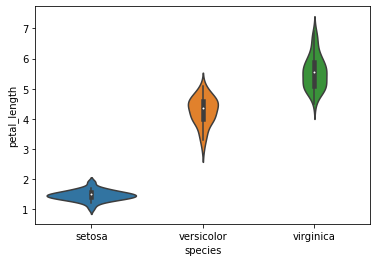

In [5]:
# plotting petal length kernels per species
sns.violinplot(data = df,
               x = "species",
               y = "petal_length")

1. Construct the design matrix with an intercept, X.

In [6]:
# TO-DO
X = df[['species']]
y = np.array(df['petal_length'])
X = pd.get_dummies(data=X)
X = X.to_numpy()
X

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

2. Find the hat matrix H for this regression.

In [7]:
# TO-DO
Xt = X.transpose()
XtXinv = np.linalg.inv(Xt @ X)
H = X @ XtXinv @ Xt
H

array([[0.02, 0.02, 0.02, ..., 0.  , 0.  , 0.  ],
       [0.02, 0.02, 0.02, ..., 0.  , 0.  , 0.  ],
       [0.02, 0.02, 0.02, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.02, 0.02, 0.02],
       [0.  , 0.  , 0.  , ..., 0.02, 0.02, 0.02],
       [0.  , 0.  , 0.  , ..., 0.02, 0.02, 0.02]])

3. Verify this hat matrix is symmetric.

In [8]:
# TO-DO
#def check_sym(X,rtol=1e-05,atol=1e-08):
#    return np.allclose(X,X.T,rtol=rtol,atol=atol)
#check_sym(H)
repr(H) == repr(np.transpose(H))

True

4. Verify this hat matrix is idempotent.

In [9]:
# TO-DO
repr(H) == repr(H@H)

True

5. Find the trace of the hat matrix.

In [10]:
# TO-DO
np.trace(H)

3.0

It turns out the trace of a hat matrix is the same as its rank! But we don't have time to prove these interesting and useful facts..

For masters students: create a matrix X-perpendicular.

In [11]:
# TO-DO


6. Using the hat matrix, compute the yhat vector and using the projection onto the residual space, compute the e vector and verify they are orthogonal to each other.

In [12]:
# TO-DO
e = (np.identity(len(H))-H)@y
y = df['petal_length']
yhat = H@y
np.transpose(e)@yhat 

-1.6786572132332367e-13

7. Compute SST, SSR and SSE and R^2 and then show that SST = SSR + SSE.

In [13]:
# TO-DO
sse = np.transpose(e)@e
ybar = np.mean(y)
sst = np.transpose(y-ybar)@(y-ybar)
Rsq = 1 - (sse/sst)
ssr = np.transpose(yhat-ybar)@(yhat-ybar)
print("SST:",sst)
print("SSR:", ssr)
print("R-Squared:",Rsq)
print("SSE:",sse)
print("Does SSR+SSE=SST?",repr(ssr+sse) == repr(sst))
print(ssr+sse)
print(sst)
# This estimate was off by a very minor amount therefore the true of false test to see if they were equal came out 
# False instead of True

SST: 464.32539999999995
SSR: 437.1028000000001
R-Squared: 0.9413717190573679
SSE: 27.222600000000003
Does SSR+SSE=SST? False
464.3254000000001
464.32539999999995


8. Find the angle theta between y - ybar and yhat - ybar and then verify that its cosine squared is the same as the $R^2$ from the previous problem.

In [14]:
n = len(X)
theta_1 = np.arccos(np.transpose(y-ybar))@(yhat-ybar)
#theta_2 = (yhat-ybar)/np.sqrt(sst*ssr)
np.transpose(y-ybar)
theta_1 @ yhat-ybar/np.sqrt(sst*ssr)

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

9. Project the y vector onto each column of the X matrix and test if the sum of these projections is the same as yhat.

In [15]:
# TO-DO
print((H @ X[:, 0])[0:3])
print((H @ X[:, 1])[0:3])
print((H @ X[:, 2])[0:3])

[1. 1. 1.]
[0. 0. 0.]
[0. 0. 0.]


10. Construct the design matrix without an intercept, X.

In [16]:
# TO-DO
X_1 = df[['species']]
X_1 = pd.get_dummies(data=X_1)
X_1 = X_1.to_numpy()
X_1

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

11. Find the OLS estimates using this design matrix. It should be the sample averages of the petal lengths within species.

In [17]:
# TO-DO
X_1t = X_1.transpose()
XtX_1inv = np.linalg.inv(X_1t @ X)
b = XtX_1inv @ X_1t @ y
hat = X.dot(b)
hat

array([1.462, 1.462, 1.462, 1.462, 1.462, 1.462, 1.462, 1.462, 1.462,
       1.462, 1.462, 1.462, 1.462, 1.462, 1.462, 1.462, 1.462, 1.462,
       1.462, 1.462, 1.462, 1.462, 1.462, 1.462, 1.462, 1.462, 1.462,
       1.462, 1.462, 1.462, 1.462, 1.462, 1.462, 1.462, 1.462, 1.462,
       1.462, 1.462, 1.462, 1.462, 1.462, 1.462, 1.462, 1.462, 1.462,
       1.462, 1.462, 1.462, 1.462, 1.462, 4.26 , 4.26 , 4.26 , 4.26 ,
       4.26 , 4.26 , 4.26 , 4.26 , 4.26 , 4.26 , 4.26 , 4.26 , 4.26 ,
       4.26 , 4.26 , 4.26 , 4.26 , 4.26 , 4.26 , 4.26 , 4.26 , 4.26 ,
       4.26 , 4.26 , 4.26 , 4.26 , 4.26 , 4.26 , 4.26 , 4.26 , 4.26 ,
       4.26 , 4.26 , 4.26 , 4.26 , 4.26 , 4.26 , 4.26 , 4.26 , 4.26 ,
       4.26 , 4.26 , 4.26 , 4.26 , 4.26 , 4.26 , 4.26 , 4.26 , 4.26 ,
       4.26 , 5.552, 5.552, 5.552, 5.552, 5.552, 5.552, 5.552, 5.552,
       5.552, 5.552, 5.552, 5.552, 5.552, 5.552, 5.552, 5.552, 5.552,
       5.552, 5.552, 5.552, 5.552, 5.552, 5.552, 5.552, 5.552, 5.552,
       5.552, 5.552,

12. Verify the hat matrix constructed from this design matrix is the same as the hat matrix constructed from the design matrix with the intercept. (Fact: orthogonal projection matrices are unique).

In [18]:
# TO-DO
repr(H) == repr(hat)

False

13. Project the y vector onto each column of the X matrix and test if the sum of these projections is the same as yhat.

In [27]:
# TO-DO
H_1 = hat @ X_1

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 150)

14. Convert this design matrix into Q, an orthonormal matrix.

In [20]:
# TO-DO
Q,R  = np.linalg.qr(X)
print(Q.shape)
print(np.linalg.matrix_rank(Q))

(150, 3)
3


15. Project the y vector onto each column of the Q matrix and test if the sum of these projections is the same as yhat.

In [28]:
# TO-DO
yhat_Q = Q@Q.T@y
repr(yhat_Q) == repr(yhat)

True

16. Find the p=3 linear OLS estimates if Q is used as the design matrix using the `LinearRegression` sklearn method. Is the OLS solution the same as the OLS solution for X?

In [22]:
# TO-DO

n = len(X)
p_plus_one = len(X[0,:])

partial_SSRs = []

for j in range(1, p_plus_one):
    # get row at column j
    qj = Q[:, j]
    
    # calculate yhat_j - we'll use the `.dot()` method for matrix multiplication
    yhat_j = qj.dot(qj.transpose().dot(y))
    
    # casting to int to round
    SSR_j = sum(yhat_j**2)
    
    # add value to end of list
    partial_SSRs += [SSR_j]
    
partial_rsqs = partial_SSRs / sst
partial_rsqs_sorted = np.sort(partial_rsqs)[::-1]
partial_rsqs_sorted_indices = np.argsort(partial_rsqs)[::-1]
Q_reduced = [Q[:, i] for i in partial_rsqs_sorted_indices]
Q_reduced = pd.DataFrame(Q_reduced).transpose() # DataFrame's can be transposed

model = LinearRegression()
model.fit(Q_reduced,y)
model.score(Q_reduced,y)

0.9413717190573679

17. Use the predict function and ensure that the predicted values are the same for both linear models: the one created with X  as its design matrix and the one created with Q as its design matrix.

In [43]:
# TO-DO
model_2 = LinearRegression()
mod_Q2 = model.fit(Q_reduced,y)
mod_Q2.predict(mod_Q2)

ValueError: Expected 2D array, got scalar array instead:
array=LinearRegression().
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

18. load the boston housing data and extract X and y. The dimensions are n = 506 and p = 13. Create a matrix that is (p + 1) x (p + 1) full of NA's. Label the columns the same columns as X. Do not label the rows. For the first row, find the OLS estimate of the y regressed on the first column only and put that in the first entry. For the second row, find the OLS estimates of the y regressed on the first and second columns of X only and put them in the first and second entries. For the third row, find the OLS estimates of the y regressed on the first, second and third columns of X only and put them in the first, second and third entries, etc. For the last row, fill it with the full OLS estimates.

In [82]:
# TO-DO
bh = datasets.load_boston()
y = bh.target 
X = np.array(df[:].values)
df = pd.DataFrame(data = bh.data, columns = bh.feature_names)
cols = 13 
rows = 506
X
for j in range(1,cols):
    b = np.empty((cols,cols,))
    x_star = X[:j]
    x_star = np.array(x_star)
    X_invert = np.transpose(np.linalg.inv(X)) @ X
    b[:j] = X_invert @ x_star.T @ y 
    matrix[j:] = b 

LinAlgError: Last 2 dimensions of the array must be square

19. Why are the estimates changing from row to row as you add in more predictors?

*TO-DO*

20. Create a vector of length p+1 and compute the R^2 values for each of the above models.

In [ ]:
# TO-DO
e

21. Is R^2 monotonically increasing? Why?

*TO-DO*